## Function derivative

In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def function(x):
    return 3*x**2 - 2*x + 1

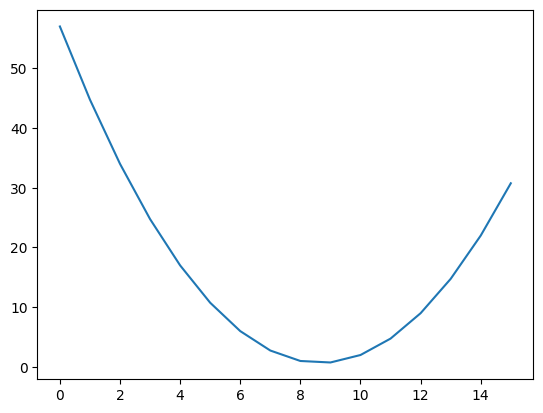

In [61]:
ys = []
for x in np.arange(-4, 4, 0.5):
    ys.append(function(x))

plt.plot(ys)

In [50]:
def function_derviative(f, x, h):
    return (f(x + h) - f(x))/h

In [62]:
x = 2

# Function value at x = 2
function(x)

# Function derivative
print('Function derivative calculated:', function_derviative(function, 2, h = 0.00001))
print('Function derivative actual:', 6*x - 2)

Function derivative calculated: 10.000030000156812
Function derivative actual: 10


## Value class

In [1]:
class Value:

    def __init__(self, data, _children = (), _op = ''):
        self.data = data
        self._prev = _children
        self._op = _op

    def __repr__(self):
        return f'Value(data={self.data})'

    def __add__(self, right_operand):
        right_operand = right_operand if isinstance(right_operand, Value) else Value(data = right_operand)
        out = Value(data = self.data + right_operand.data)
        out._prev = (self, right_operand)
        out._op = '+'
        return out

    def __radd__(self, right_operand):
        out = self + right_operand
        return out

    def __mul__(self, right_operand):
        right_operand = right_operand if isinstance(right_operand, Value) else Value(data = right_operand)
        out = Value(data = self.data * right_operand.data)
        out._prev = (self, right_operand)
        out._op = '-'
        return out

    def __rmul__(self, right_operand):
        out = self * right_operand
        return out

In [2]:
a = Value(2.0)
b = Value(10.0)
c = Value(3.0)

print('a + 5.0:', a + 5.0)
print('5.0 + a:', 5.0 + a)
print('a + b + c:', a + b + c)
print('-' * 10)
print('a * 5.0:', a * 5.0)
print('5.0 * a:', 5.0 * a)
print('a * b * c:', a * b * c)

a + 5.0: Value(data=7.0)
5.0 + a: Value(data=7.0)
a + b + c: Value(data=15.0)
----------
a * 5.0: Value(data=10.0)
5.0 * a: Value(data=10.0)
a * b * c: Value(data=60.0)


In [3]:
d = a + b
d._prev, d._op

((Value(data=2.0), Value(data=10.0)), '+')

## Visualisation

In [4]:
import graphviz

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = '{data %.4f}' % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

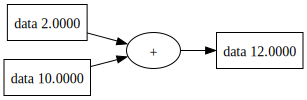

In [8]:
draw_dot(d)